Corpora:

- corpus Gysseling (makkelijk, het lidwoord-zijn zit in subtype bij pronoun/determiner)
- brievenalsbuit (17e en 18e eeuw graag even apart houden, dus twee tellingen per eeuw om te zien of er een verandering zit)  (hier is geen onderscheid bepaald/onbepaald gecodeerd, maar dat is natuurlijk uit het lemma te halen; hier zou je ook iets met sociale status etc kunnen proberen)
- CLVN (misschien even strikt beperken tot 15e en 16e eeuw) (is niet betrouwbaar taalkundig verrijkt, dus lastig)
- Corpus hedendaags Nederlands (makkelijk)
- CGN (makkelijk)
- SoNar (makkelijk) (groeperen naar textsoort?)
- Wablief (iets lastiger, heb ik niet paraat ergens staan)
- zeventiende eeuwse kranten  (lastig, is niet taalkundig verrijkt)
- het corpus tijdschriften van Freek Van de Velde voor de 19e en 20e eeuw [zal ik dat aan Freek vragen?] (hebben we wel in huis, dus kunnen wij ook doen)
- twitter via Gosse (kan Gosse dat doen?)


,identity,identityDisplay,size,docs,subcorpus_docs,subcorpus_tokens,hits_per_million
0,str:40,40,11254,1640,1667,285364,39437.350191
1,str:26,26,11063,255,256,589699,18760.418451
2,str:Unknown,Unknown,10336,540,550,322723,32027.466279
3,str:24,24,10022,1052,1066,430891,23258.782383
4,str:53,53,9986,196,198,288672,34592.894358
5,str:39,39,8158,1442,1468,154410,52833.365715
6,str:48,48,7665,166,166,257657,29748.852156
7,str:55,55,7373,175,176,225717,32664.797069
8,str:54,54,6901,174,175,196232,35167.556770
9,str:56,56,6898,147,147,214443,32167.056048


{'numberOfHits': 260517, 'numberOfDocs': 12636, 'windowHasNext': 'false', 'subcorpusTokens': 10085169, 'subcorpusDocs': 12768}


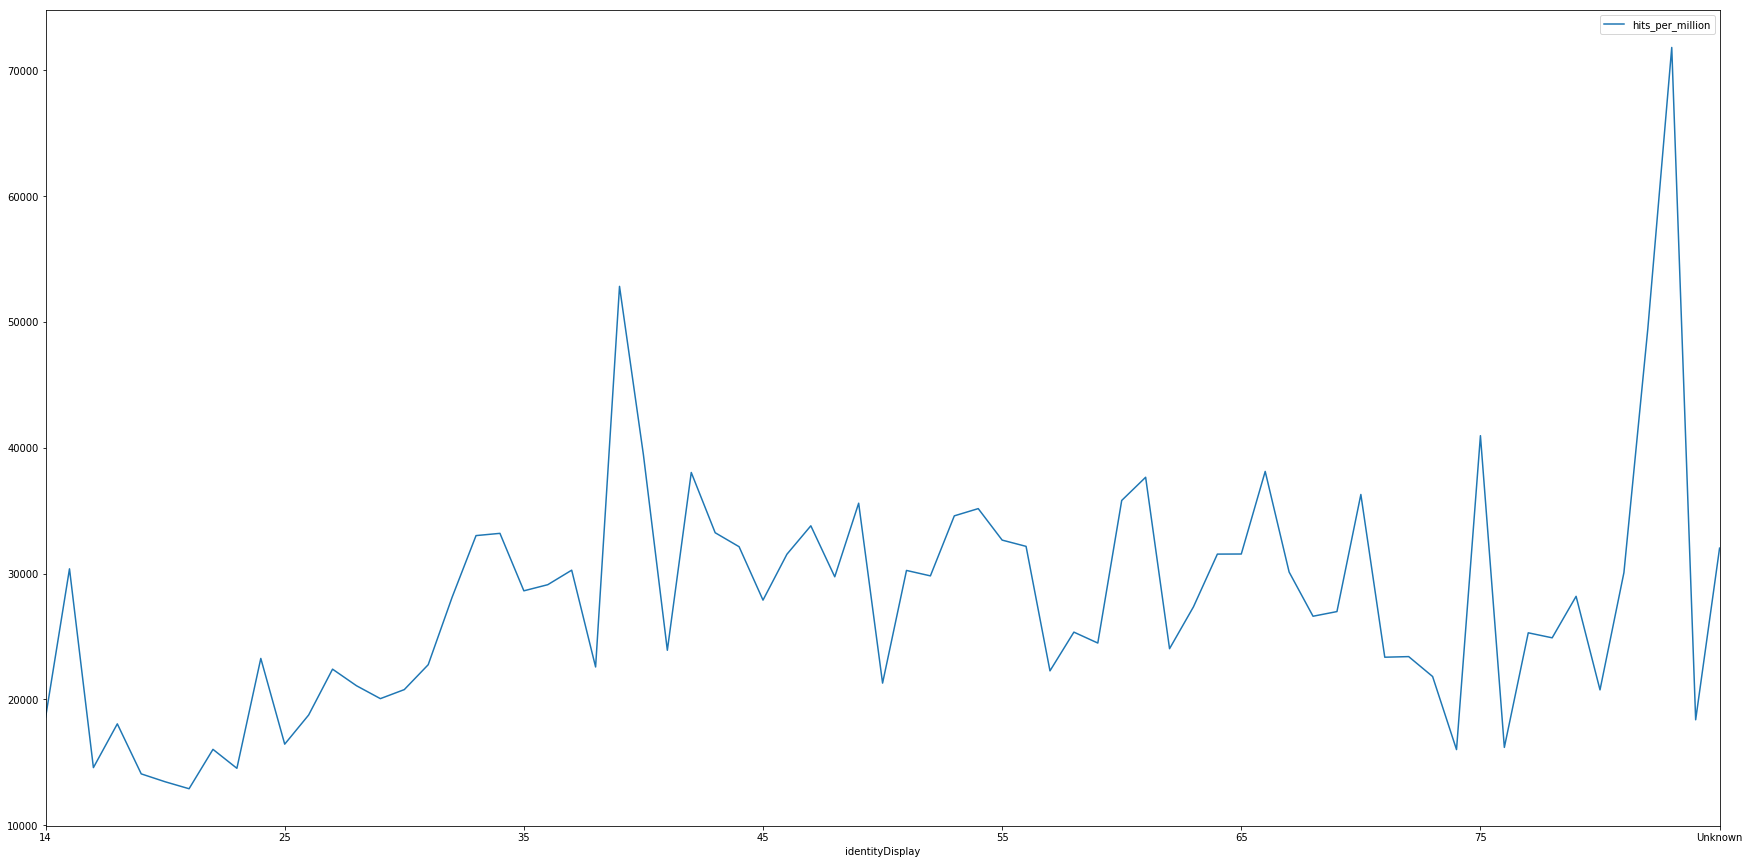

In [4]:
from chaininglib.ui.search import create_corpus_ui
from chaininglib.ui.dfui import display_df
from chaininglib.search.CorpusQuery import *
import chaininglib.constants as constants
import re
import random

def add_corpus(name, config):
  constants.AVAILABLE_CORPORA[name] = config

add_corpus('ja_nl', {'blacklab_url':'http://corpora.ato.ivdnt.org/blacklab-server//JapansNederlands',
                     'default_method':'blacklab'})
add_corpus('chn_i', {'blacklab_url':'http://svotmc10.ivdnt.loc/blacklab-server/chn',
                     'default_method':'blacklab'})
add_corpus('zeebrieven_i', {'blacklab_url':'http://svotmc10.ivdnt.loc/blacklab-server/zeebrieven',
                     'default_method':'blacklab'})
add_corpus('gysseling', {'blacklab_url':'http://corpusgysseling.ivdnt.org/blacklab-server/Gysseling',
                     'default_method':'blacklab'})
add_corpus('wablieft', {'blacklab_url':'http://pcob67:8080/blacklab-server/Wablieft',
                     'default_method':'blacklab'})
add_corpus('opensonar', {'blacklab_url':'http://svotmc10.ivdnt.loc/blacklab-server/opensonar',
                     'default_method':'blacklab'})



corpus_name='zeebrieven'

def test_zeebrieven():
  corpus_name='zeebrieven_i'
  corpus_searched = create_corpus(corpus_name).pattern("[lemma='kapitein']").group_by(["hit:word:i"]).max_results(1000).search()
  df_corpus = corpus_searched.kwic()
  display_df(df_corpus)
  print(corpus_searched.summary())

def test_ja_nl():
  corpus_name='ja_nl'
  query='([pos="Verb.*" & lemma != "する"]|[pos="Noun.*"][lemma="する"]) within (<sentence/> (<s/> containing [lemma="vernietigen"]))'
  # corpus_searched = create_corpus(corpus_name).pattern(query).group_by(["field:genre:i"]).max_results(1000).search()
  corpus_searched = create_corpus(corpus_name).pattern(query).group_by(["field:genre:i"]).max_results(0).search()
  df_corpus = corpus_searched.kwic()
  summary = corpus_searched.summary()
  print(summary)
  print(df_corpus.to_string())
  print(summary)

def test_cgn():
  query="[lemma='de']"
  cgn_filter={'Corpus_title': 'CGN'}
  cgn_corpus = create_corpus('opensonar').metadata_filter(cgn_filter)
  cgn_searched = cgn_corpus.pattern(query).group_by(["field:Age:i"]).search()
  df=cgn_searched.kwic()
  display_df(df)
  print(cgn_searched.summary())
  plot_df(df, 'identityDisplay', y_columns=['hits_per_million'] )
  
def test_openchn(query):
  corpus = create_corpus('openchn')
  #query = "[lemma='de']"
  grouping = ['field:witnessYear_from:i']
  df = corpus.pattern(query).group_by(grouping).max_results(1000000000).search().kwic()
  display_df(df)
  plot_df(df,'identityDisplay', ['hits_per_million'])
  return df

def search_and_group(corpus_name,query, field, filter=None, validity_filter="^[0-9]{4}$"):
  corpus = create_corpus(corpus_name)
  if not filter == None:
    corpus=corpus.metadata_filter(filter)
  
  grouping = ['field:' + field + ':i']
  df = corpus.pattern(query).group_by(grouping).max_results(1000000000).search().kwic()
  
  if not validity_filter == None: # remove some data noise (non-wellformed dates etc)
     df = df[df.apply(lambda x:  re.match(validity_filter, x['identityDisplay']) != None, axis=1)]
  return df

# disable caching for query by adding a random clause 
def obfuscate(query):
  return query.replace("]", " | lemma='gna_gna_" + str(random.randint(0,1000000)) +  "']")

# simulate grouping by separate querying for each value
def silly_grouping(corpus_name, query, field, values):
    result_frames = list(map(lambda value: search_and_group(corpus_name, obfuscate(query), field, filter={field: value}, validity_filter="^[0-9]{4}$"), values))
    concatenation =  pd.concat(result_frames)
    display_df(concatenation)
    plot_df(concatenation, 'identityDisplay', 'hits_per_million')

def flatten(l):
    return [item for sublist in l for item in sublist]

def merge_frames(frames, key_field, display_field):
    merged_frame = frames[0].rename(columns={display_field: display_field + '_0'})
    for i in range(1,len(frames)):
        #print('merging:' + str(i))
        renamed_frame=frames[i].rename(columns={display_field: display_field + '_' + str(i)})
        merged_frame = pd.merge(merged_frame,renamed_frame,on=key_field,how='outer')
    return merged_frame

def search_and_group_multiple(corpus_name, queries, grouping_field, filter=None, validity_filter="^[0-9]{4}$"):
  dataframes = list(map(lambda x: search_and_group(corpus_name, x, grouping_field, filter, validity_filter), queries))

  #join the frames
  field_to_show = 'hits_per_million'
  merged = merge_frames(dataframes,'identityDisplay', field_to_show)
  
  rename_columns = {}
  for i in range(0,len(queries)):
    rename_columns[field_to_show + '_' + str(i)] = queries[i]
  renamed_frame = merged.rename(columns=rename_columns)
  
  #display_df(renamed_frame)
  plot_df(renamed_frame, 'identityDisplay', y_columns=queries  )
  return zip(queries,dataframes)
    

def plot_df(df,x_column, y_columns):
    #df_values = df[y_column].apply(lambda x: int(x))
    dfsorted = df.sort_values(by=[x_column])
    dfsorted.plot.line(x_column, y_columns, figsize=[30,15])
    
test_cgn()
  

...Searching chn_i at result 0...                                                                                                       

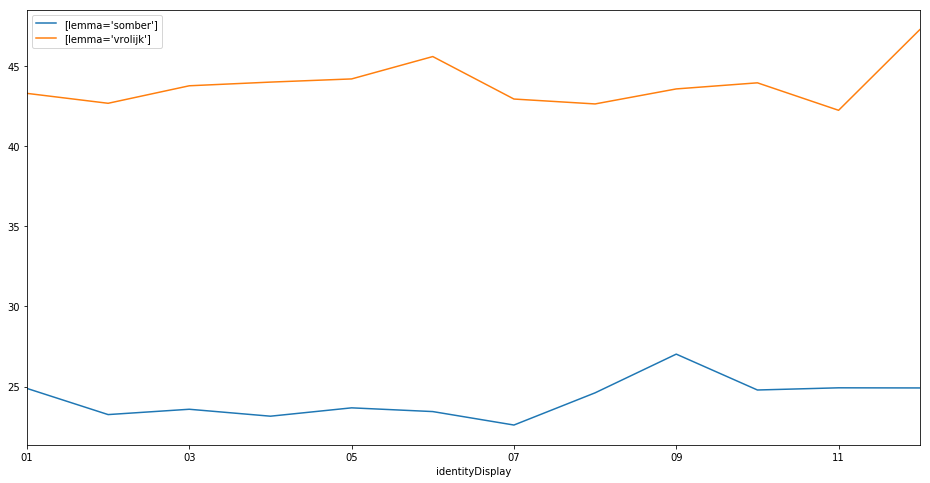

In [2]:
df = search_and_group_multiple('chn_i', ["[lemma='somber']", "[lemma='vrolijk']"], 'pubMonth_from', {'witnessYear_from': [2000,2020]}, 
                      validity_filter="^[0-9]{2}$")



...Searching chn_i at result 0...                                                                                                                                                                                                                                               

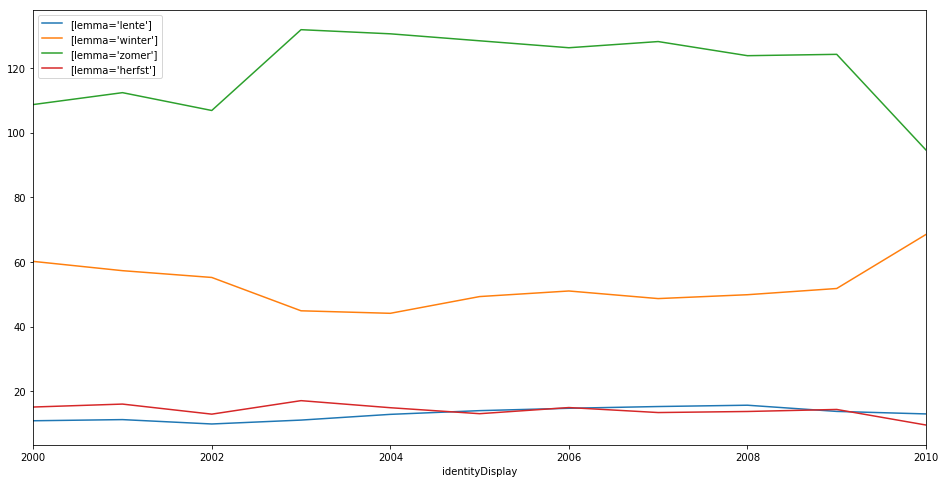

In [3]:
search_and_group_multiple('chn_i', ["[lemma='lente']", "[lemma='winter']","[lemma='zomer']", "[lemma='herfst']"], 
                          'pubYear_from',
                          {'pubYear_from': [2000,2010]})

grouping criteria:['field:witnessYear_from:i']
grouping? Truehn_i at result 0...                                
grouping criteria:['field:witnessYear_from:i']                   
...Searching chn_i at result 0...                                grouping? True
merging:1                                                        


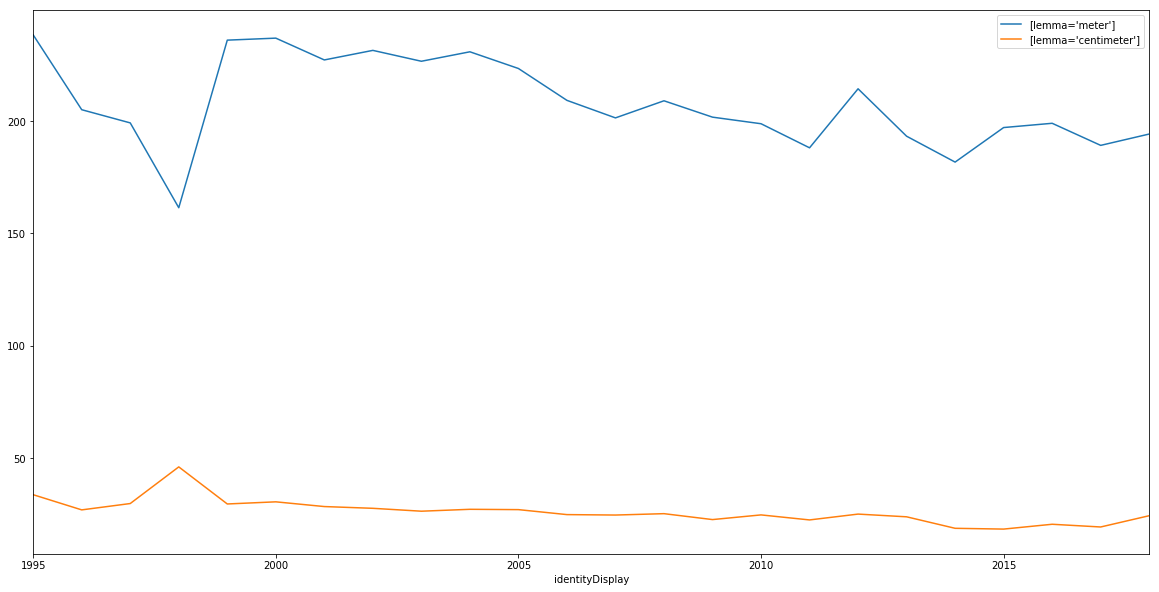

In [68]:
search_and_group_multiple('chn_i', ["[lemma='meter']", "[lemma='centimeter']"], 
                          'witnessYear_from',
                          {'witnessYear_from': [1995,2020]})

...Searching chn_i at result 0...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

,identity,identityDisplay,size,docs,subcorpus_docs,subcorpus_tokens,hits_per_million
0,str:1995,1995,4684410,127390,129700,69682168,67225.376799
0,str:1996,1996,1184259,5911,5926,17130999,69129.593668
0,str:1997,1997,616104,11324,11474,9214430,66862.952999
0,str:1998,1998,212346,2598,2622,3517541,60367.739850
0,str:1999,1999,4599810,174971,176376,72271680,63646.092079
0,str:2000,2000,6324940,232759,234508,100345157,63031.841188
0,str:2001,2001,5731073,202570,203940,92110667,62219.427854
0,str:2002,2002,5006300,185406,186899,80263756,62373.108978
0,str:2003,2003,7391116,193432,197295,115188588,64165.349435
0,str:2004,2004,7605115,204014,209506,120774714,62969.430836


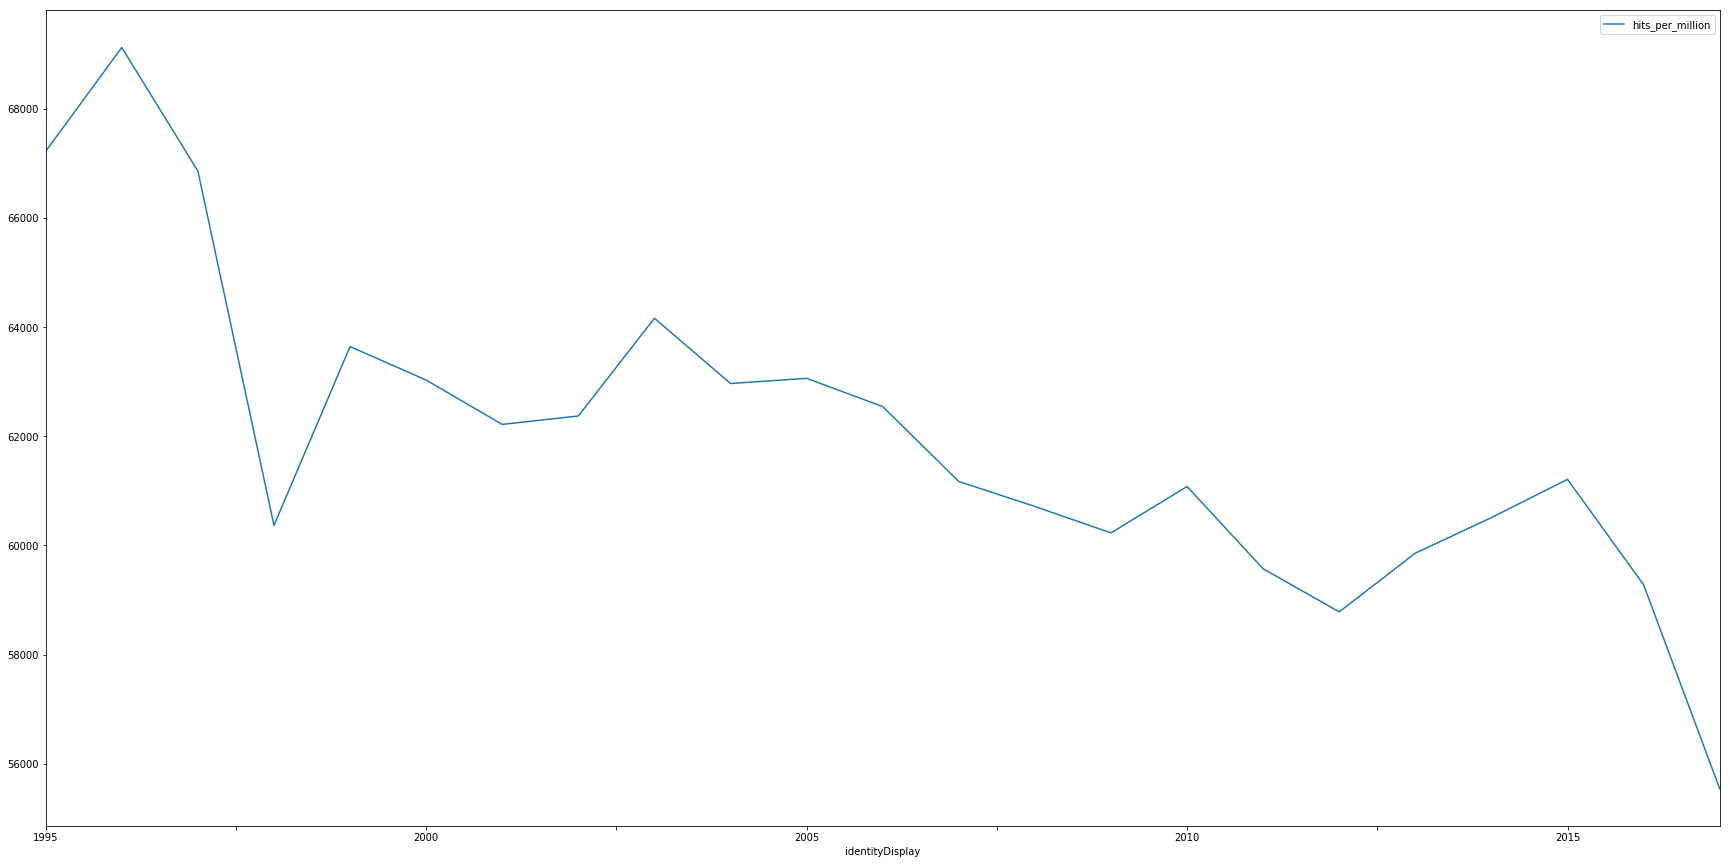

mijn_resultaten.csv saved


In [27]:
values = [str(j) for j in range(1995,2018)]
silly_grouping('chn_i', "[lemma='de']",'pubYear_from', values)

...Searching chn_i at result 0...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

,identity,identityDisplay,size,docs,subcorpus_docs,subcorpus_tokens,hits_per_million
0,str:1995,1995,1410,738,129700,69682168,20.234732
0,str:1996,1996,508,220,5926,17130999,29.653846
0,str:1997,1997,153,87,11474,9214430,16.604391
0,str:1998,1998,56,35,2622,3517541,15.920212
0,str:1999,1999,1717,1132,176376,72271680,23.757577
0,str:2000,2000,2339,1413,234508,100345157,23.309545
0,str:2001,2001,3243,1745,203940,92110667,35.207649
0,str:2002,2002,2033,1290,186899,80263756,25.328992
0,str:2003,2003,3630,1658,197295,115188588,31.513538
0,str:2004,2004,3350,1471,209506,120774714,27.737594


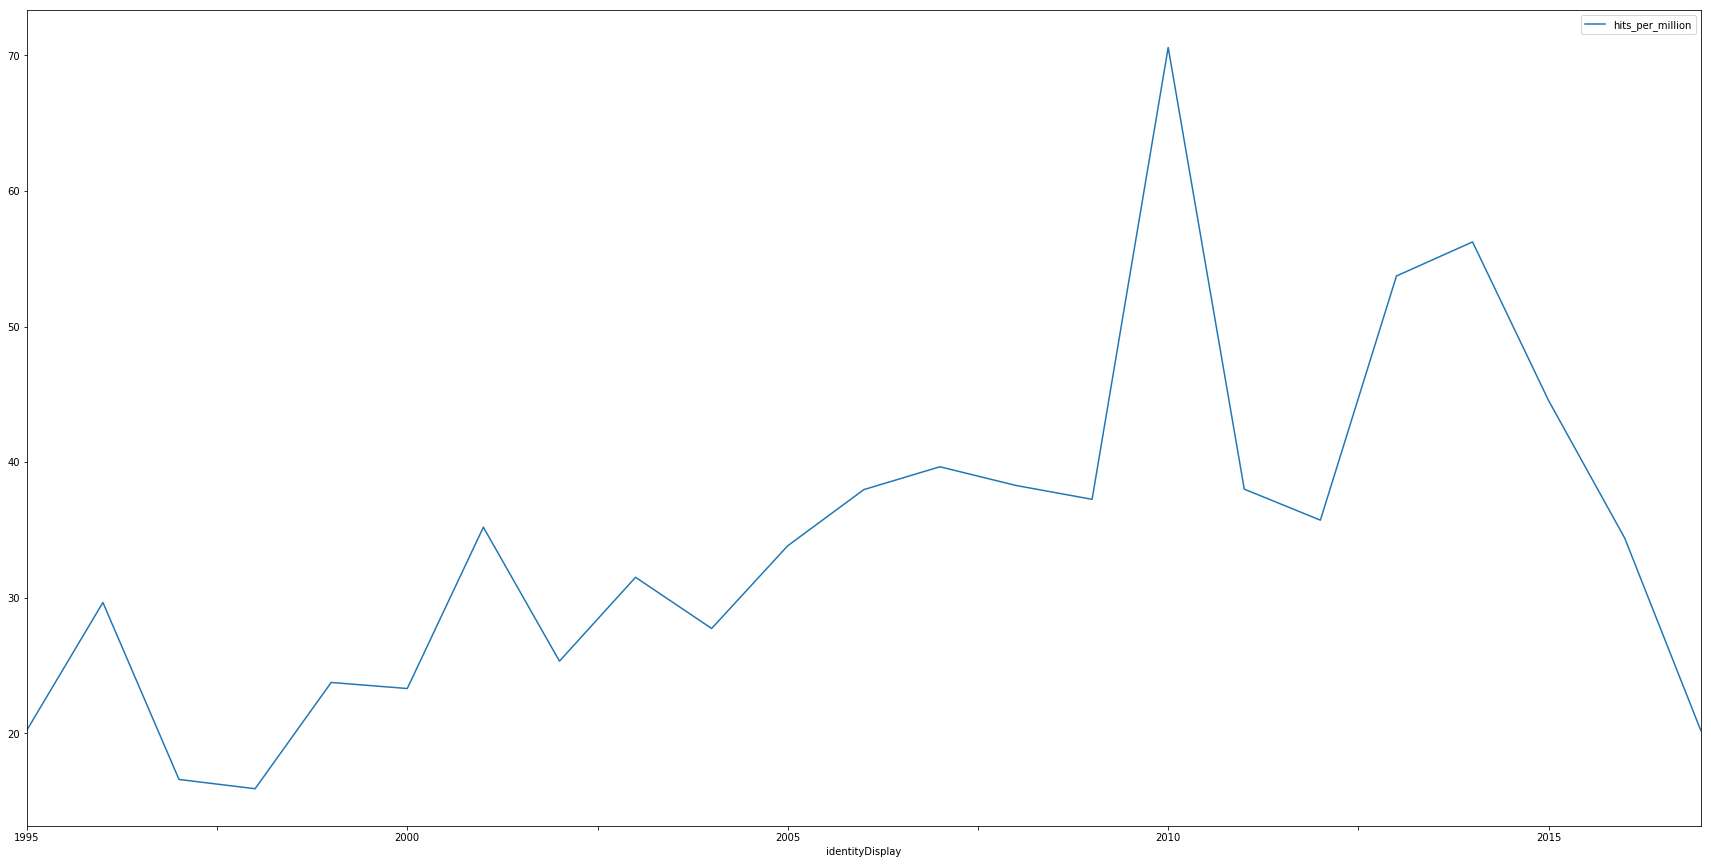

rcsv saved


In [26]:
silly_grouping('chn_i', "[lemma='brandweer']",'pubYear_from', values)

...Searching gysseling at result 0...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

,identity,identityDisplay,size,docs,subcorpus_docs,subcorpus_tokens,hits_per_million
0,str:1200,1200,85,1,1,1595,53291.536050
0,str:1210,1210,90,1,1,1628,55282.555283
0,str:1220,1220,47,1,1,4318,10884.668828
0,str:1230,1230,506,3,4,12755,39670.717366
0,str:1240,1240,42,2,2,17329,2423.682844
0,str:1250,1250,1071,10,11,23599,45383.278952
0,str:1260,1260,5996,68,72,132986,45087.452815
0,str:1270,1270,2199,193,196,64773,33949.330740
0,str:1280,1280,28800,638,649,641148,44919.425780
0,str:1290,1290,18350,1111,1169,580508,31610.244820


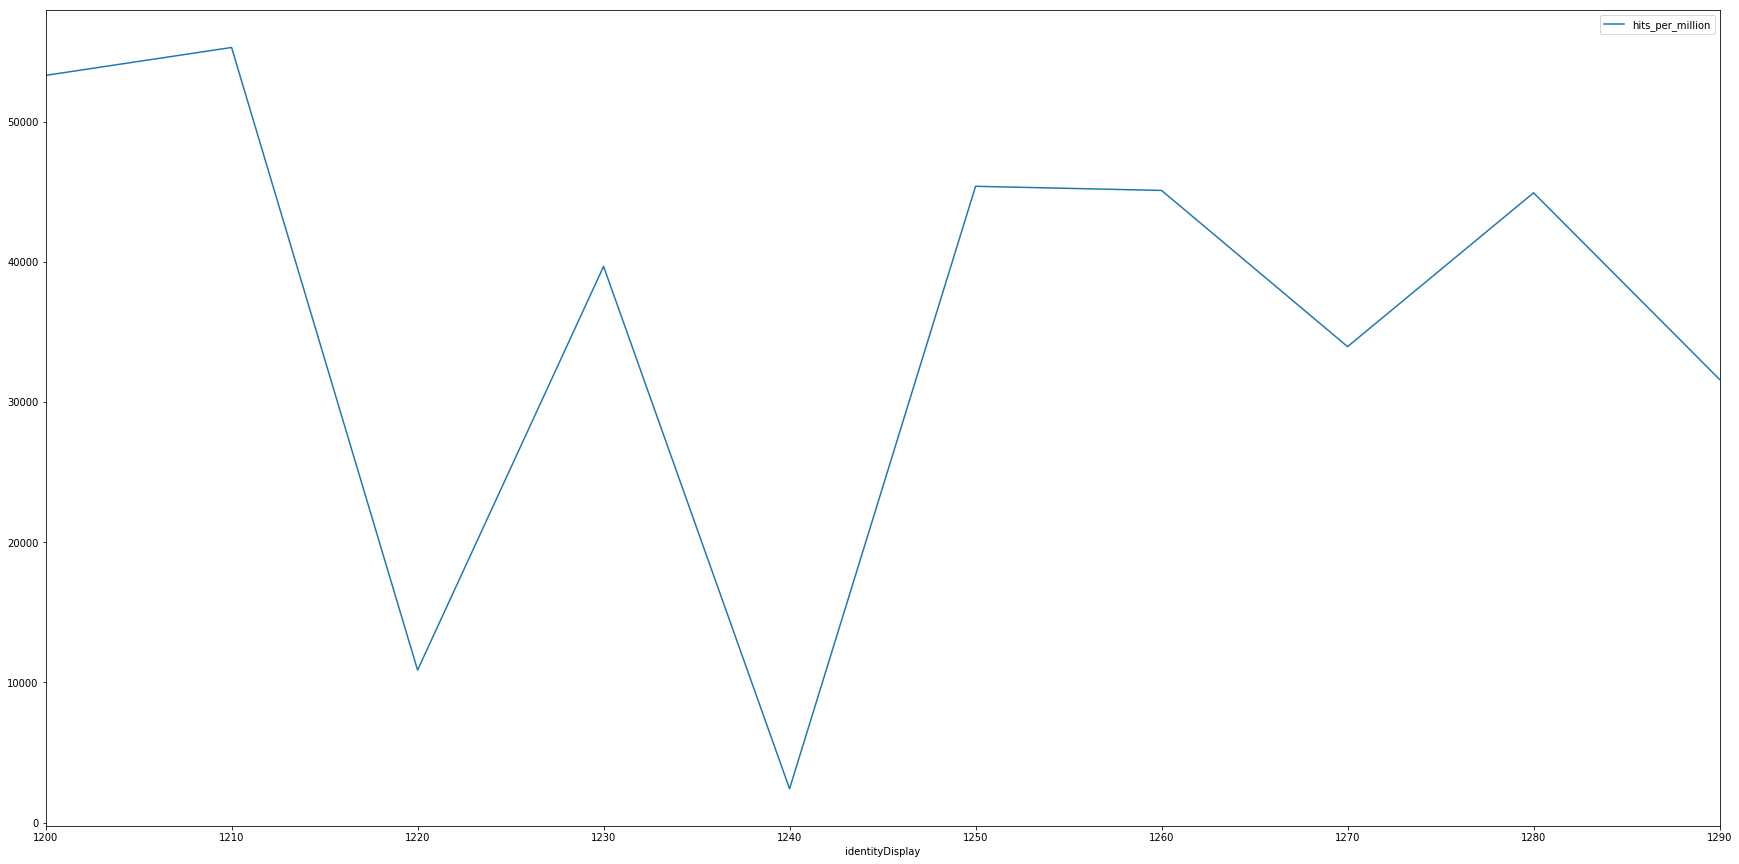

In [3]:
silly_grouping('gysseling', "[lemma='de']",'decade', [str(1200 + 10*j) for j in range(0,10)])

...Searching gysseling at result 0...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

,identity,identityDisplay,size,docs,subcorpus_docs,subcorpus_tokens,hits_per_million
0,str:1201,1201,90,1,1,1628,55282.555283
0,str:1210,1210,47,1,1,4318,10884.668828
0,str:1220,1220,140,1,1,3885,36036.036036
0,str:1236,1236,170,1,1,4210,40380.047506
0,str:1237,1237,196,1,1,4463,43916.647995
0,str:1240,1240,111,4,4,19526,5684.728055
0,str:1248,1248,652,1,1,13394,48678.512767
0,str:1249,1249,12,1,1,273,43956.043956
0,str:1251,1251,66,2,5,1154,57192.374350
0,str:1252,1252,9,1,1,77,116883.116883


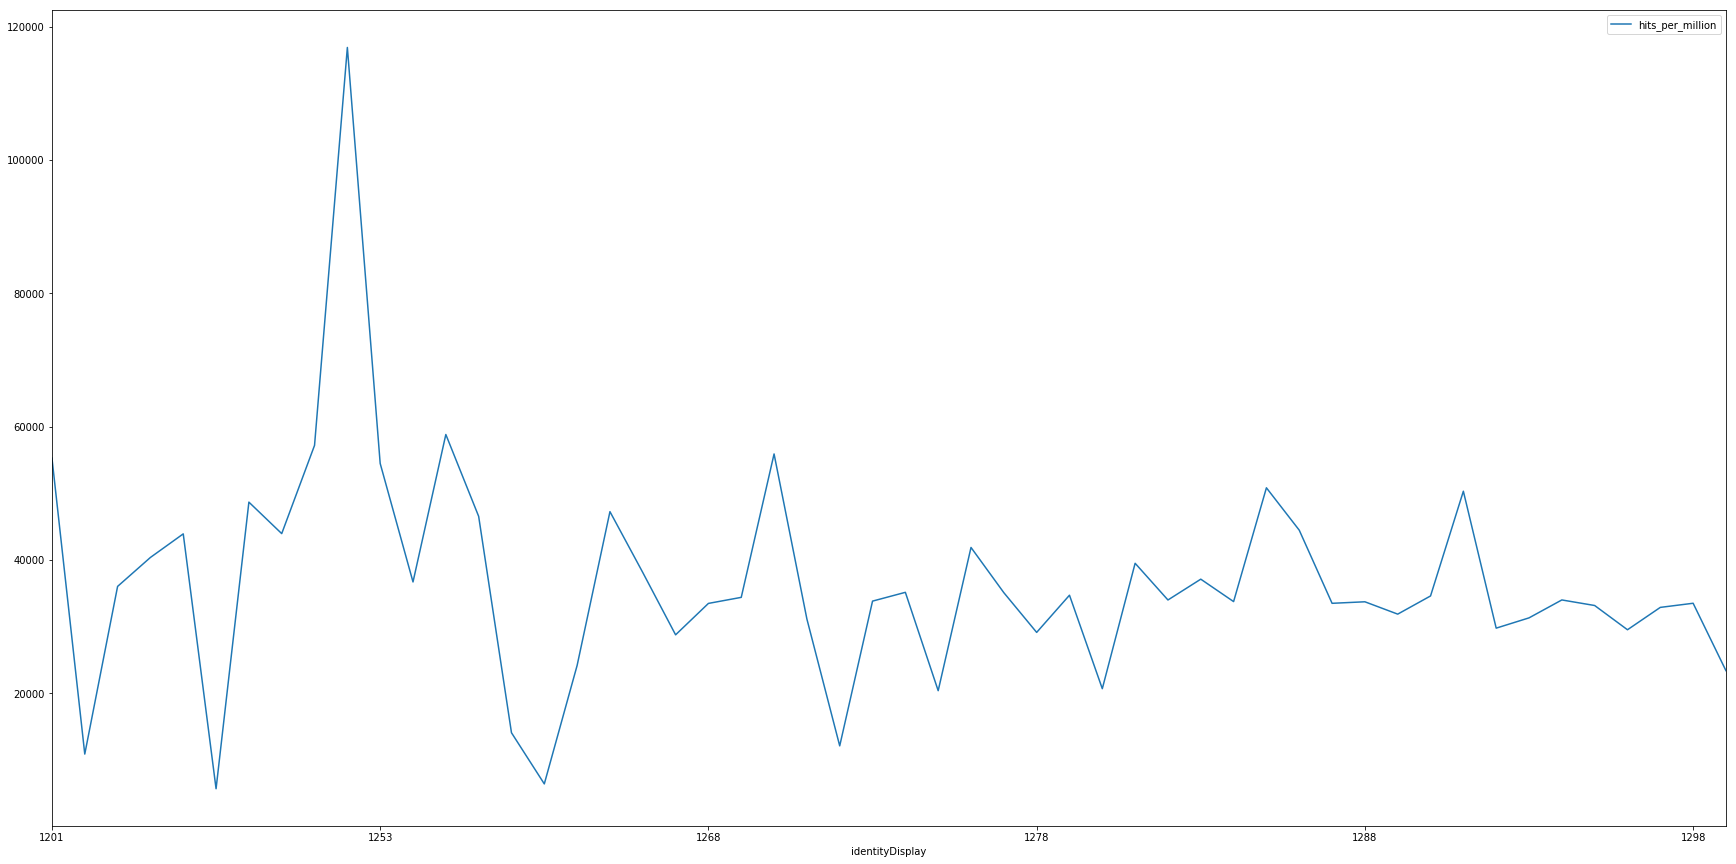

In [9]:
silly_grouping('gysseling', "[lemma='de']",'witness_year_from', [str(1200 + j) for j in range(0,100)])

...Searching gysseling at result 0...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

,identity,identityDisplay,size,docs,subcorpus_docs,subcorpus_tokens,hits_per_million
0,str:1201,1201,31,1,1,1628,19041.769042
0,str:1220,1220,87,1,1,3885,22393.822394
0,str:1236,1236,133,1,1,4210,31591.448931
0,str:1237,1237,126,1,1,4463,28232.130854
0,str:1240,1240,83,4,4,19526,4250.742600
0,str:1248,1248,41,1,1,13394,3061.072122
0,str:1249,1249,7,1,1,273,25641.025641
0,str:1251,1251,14,3,5,1154,12131.715771
0,str:1253,1253,41,3,3,3304,12409.200969
0,str:1254,1254,71,1,1,3569,19893.527599


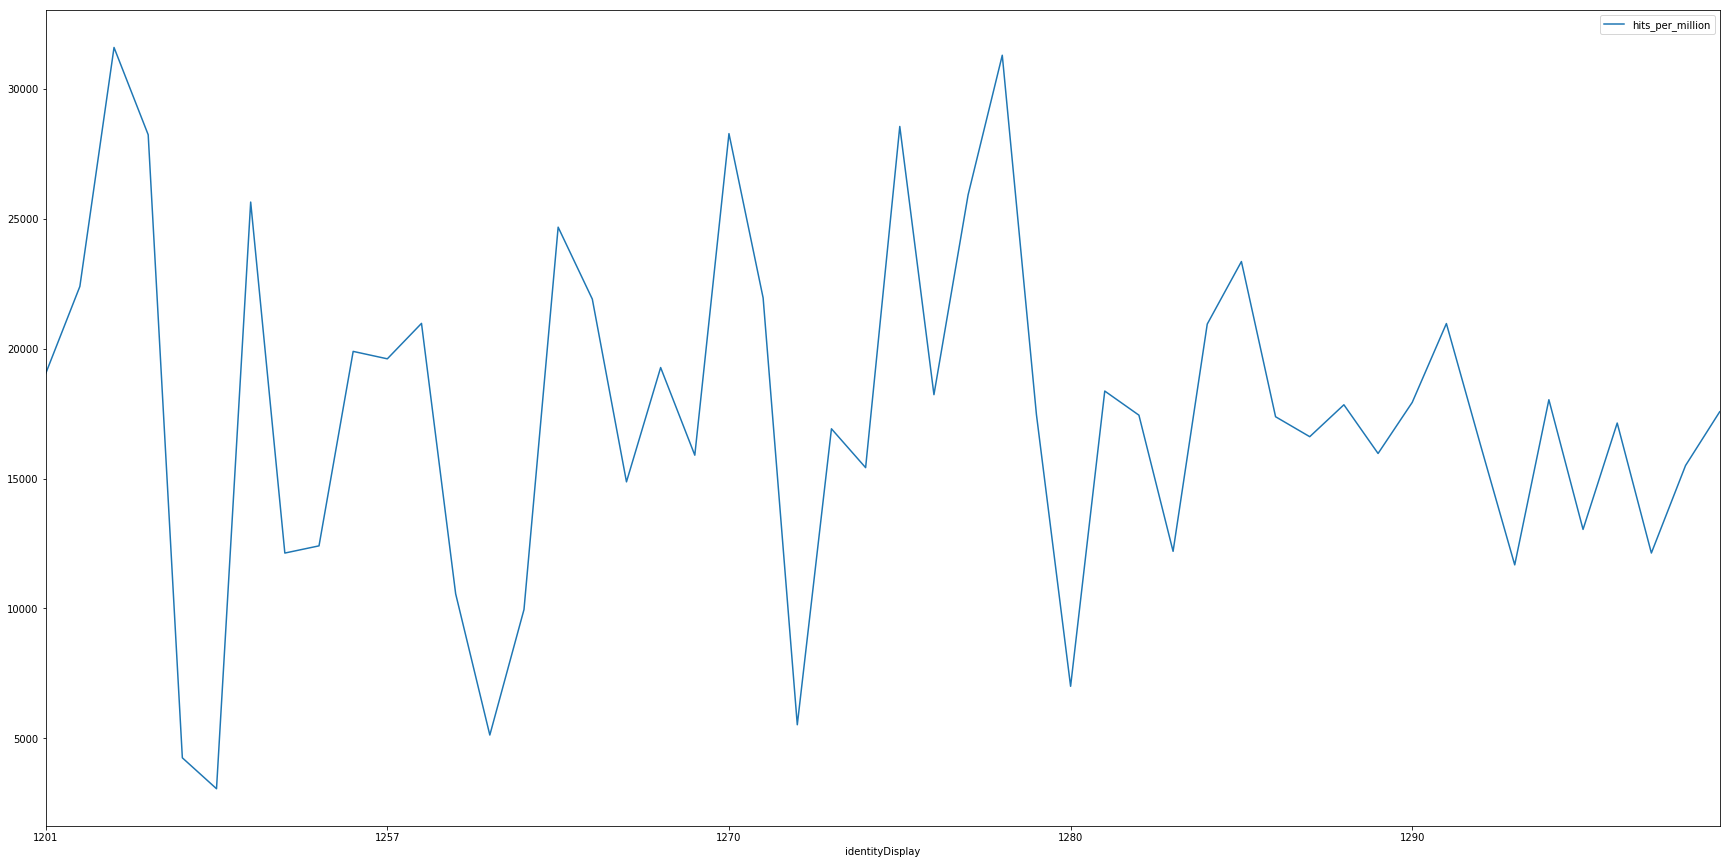

In [10]:
silly_grouping('gysseling', "[lemma='die']",'witness_year_from', [str(1200 + j) for j in range(0,100)])

...Searching gysseling at result 0...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

,identity,identityDisplay,size,docs,subcorpus_docs,subcorpus_tokens,hits_per_million
0,str:1200,1200,106,1,1,1595,66457.680251
0,str:1210,1210,94,1,1,1628,57739.557740
0,str:1220,1220,59,1,1,4318,13663.733210
0,str:1230,1230,864,3,4,12755,67738.141905
0,str:1240,1240,56,2,2,17329,3231.577125
0,str:1250,1250,1768,10,11,23599,74918.428747
0,str:1260,1260,8233,71,72,132986,61908.772352
0,str:1270,1270,4466,194,196,64773,68948.481620
0,str:1280,1280,42773,646,649,641148,66713.145795
0,str:1290,1290,38356,1162,1169,580508,66073.163505


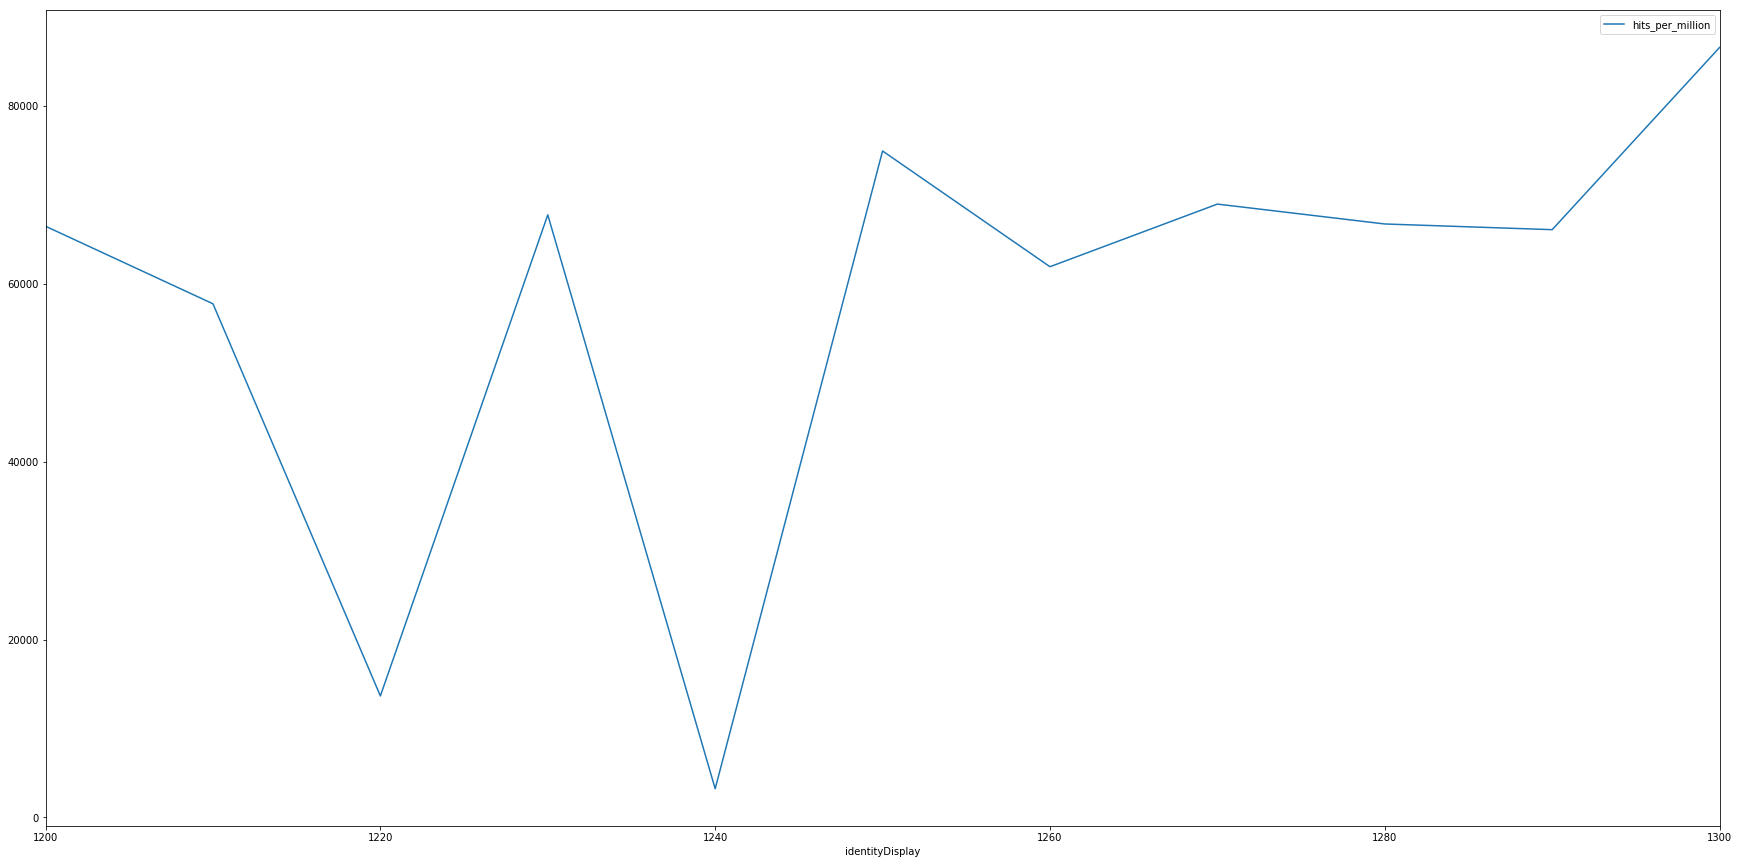

In [12]:
silly_grouping('gysseling', '[pos="pd"&pos_type="dem"&pos_subtype="art"]','decade', [str(1200 + 10*j) for j in range(0,11)])

In [14]:
miljoen=1000000
gysseling_tokens=1547893
gysseling_hits_article=102706
gysseling_hits_article_de=60211
gysseling_hits_article_die=13642
gysseling_hits_article_dat=13642
gysseling_de_per_million = (gysseling_hits_article_de / 1547893) * miljoen
print(gysseling_de_per_million)

38898.683565336876


<?xml version="1.0" encoding="utf-8" ?>                          
<blacklabResponse>
  <summary>
    <searchParam>
      <first>0</first>
      <group>hit:lemma:i</group>
      <indexname>JapansNederlands</indexname>
      <number>1000</number>
      <patt>([pos=&quot;Verb.*&quot; &amp; lemma != &quot;する&quot;]|[pos=&quot;Noun.*&quot;][lemma=&quot;する&quot;]) within (&lt;sentence/&gt; (&lt;s/&gt; containing [lemma=&quot;vernietigen&quot;]))</patt>
    </searchParam>
    <searchTime>504</searchTime>
    <numberOfGroups>421</numberOfGroups>
    <largestGroupSize>314</largestGroupSize>
    <windowFirstResult>0</windowFirstResult>
    <requestedWindowSize>1000</requestedWindowSize>
    <actualWindowSize>421</actualWindowSize>
    <windowHasPrevious>false</windowHasPrevious>
    <windowHasNext>false</windowHasNext>
    <stillCounting>false</stillCounting>
    <numberOfHits>1725</numberOfHits>
    <numberOfHitsRetrieved>1725</numberOfHitsRetrieved>
    <stoppedCountingHits>false</stoppedCount

,identity,identityDisplay,size,docs,subcorpus_docs,subcorpus_tokens,hits_per_million
0,cws:lemma:i:破壊:する,破壊 する,314,209,-1,-1,-1
1,cws:lemma:i:れる,れる,126,100,-1,-1,-1
2,cws:lemma:i:壊す,壊す,71,60,-1,-1,-1
3,cws:lemma:i:いる,いる,68,59,-1,-1,-1
4,cws:lemma:i:せる,せる,50,46,-1,-1,-1
5,cws:lemma:i:てる,てる,44,41,-1,-1,-1
6,cws:lemma:i:滅ぼす,滅ぼす,42,37,-1,-1,-1
7,cws:lemma:i:殺す,殺す,39,36,-1,-1,-1
8,cws:lemma:i:なる,なる,38,36,-1,-1,-1
9,cws:lemma:i:できる,できる,24,24,-1,-1,-1


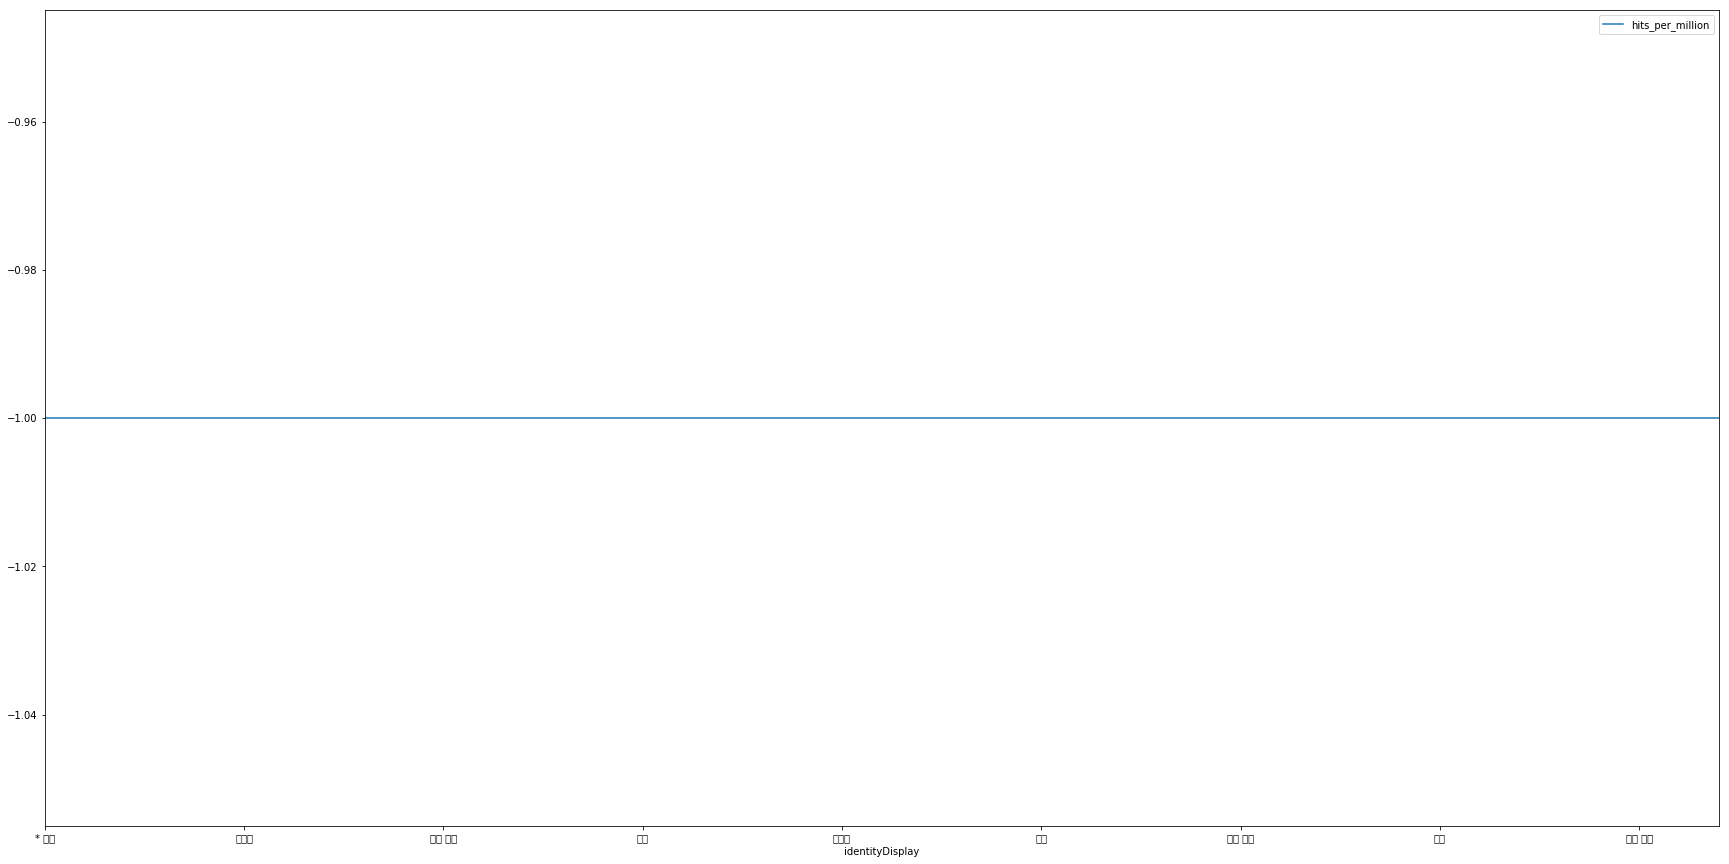

In [4]:
test_ja_nl()